DSC160 Data Science and the Arts - Twomey - Spring 2020 - [dsc160.roberttwomey.com](http://dsc160.roberttwomey.com)

# Exercise 2: Audio Classification with MFCCs

This exercise walks you through feature extraction and genre classification based on MFCCs, using audio frames extracted from two instances of distinct audio styles (classical and rap music).

It has two parts:
- [Part 1](#Part-1:-Genre-Recognition). In this part you will load two audio files as genre examples, extract MFCC features from each, and implement a simple SVM classifier.
  - [Step 1 - Load Files and Display Audio](#Step-1:-Load-Files-and-Display-Audio)
  - [Step 2 - Extract Features](#Step-2:-Extract-Features)
  - [Step 3 - Train a Classifier](#Step-3:-Train-a-Classifier)
  - [Step 4 - Run the Classifier](#Step-4:-Run-the-Classifier)
- [Part 2](#Part-2:-Extension). In this part you will extend the work from Part 1, either creating a new classifier using new genre examples and training examples from your own music collection, implementing a new classifier method, or experimenting with different features for the SVM and existing examples.
  - [Part 2A - Code for your Extension](#2A.-Code-for-Extension)
  - [Part 2B - Discussion of Results](#2B.-Discussion-of-Results)
  
Once you have completed both parts, you will submit your completed notebook as a pdf to gradescope for grading.

Note: this is a simplified genre classification example. For a more comprehensive approach combining timbral, beat, and pitch features, see Tzanetakis and Cook ['Musical Genre Classification of Audio Signal'](https://pdfs.semanticscholar.org/4ccb/0d37c69200dc63d1f757eafb36ef4853c178.pdf) from IEEE Transactions on Audio and Speech Processing 2002. Many of the techniques described in that paper can be implemented using librosa and our numpy/scipy toolkits for your own Project 1.

## Setup

Import necessary modules:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

import librosa
import librosa.display

from IPython.display import Audio

import requests
import os

import sklearn
import numpy as np

import pandas as pd

In [2]:
t1, t1_sr = librosa.load("audio/taylor.mp3",duration=120)
t2, t2_sr = librosa.load("audio/taylor2.mp3",duration=120)
t3, t3_sr = librosa.load("audio/taylor3.mp3",duration=120)
b1, b1_sr = librosa.load("audio/big.mp3",duration=120)
b2, b2_sr = librosa.load("audio/big2.mp3",duration=120)
b3, b3_sr = librosa.load("audio/big3.mp3",duration=120)

/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home

# Taylor Swift three sound samples: WavePlots

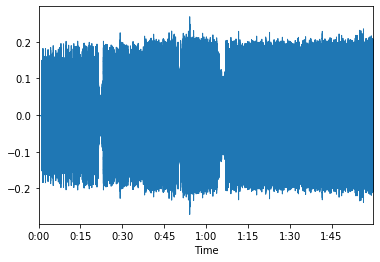

In [3]:
librosa.display.waveplot(t1,sr=t1_sr)

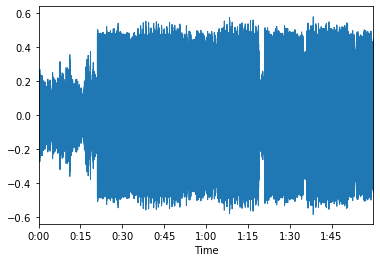

In [4]:
librosa.display.waveplot(t2,sr=t2_sr)

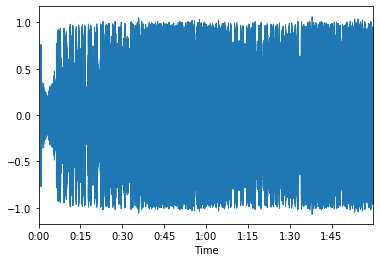

In [5]:
librosa.display.waveplot(t3,sr=t3_sr)

# Biggie Small three sound samples

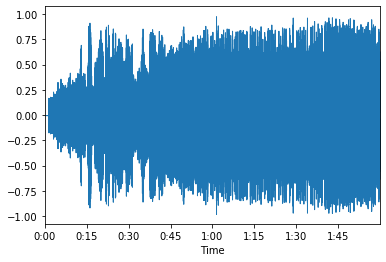

In [6]:
librosa.display.waveplot(b1,sr=b1_sr)

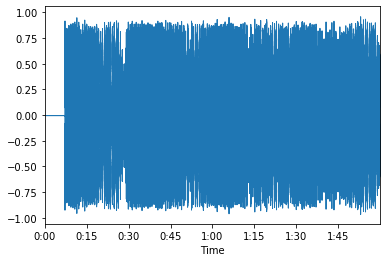

In [7]:
librosa.display.waveplot(b2,sr=b2_sr)

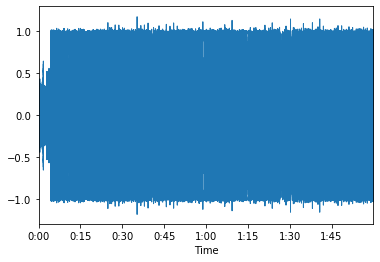

In [9]:
librosa.display.waveplot(b3,sr=b3_sr)

In [10]:
def draw(y,sr):
    # calculate
    melspe = librosa.feature.melspectrogram(y=y, sr=sr)
    logspect = librosa.power_to_db(abs(melspe))

    # display
    plt.figure(figsize=(16, 5))
    librosa.display.specshow(logspect, sr=sr, x_axis='time',y_axis='log')
    plt.show()
    

# Taylor Swift three sound samples: logspect

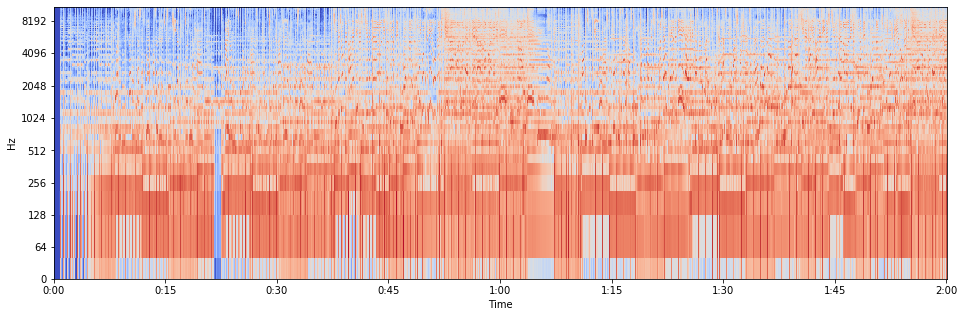

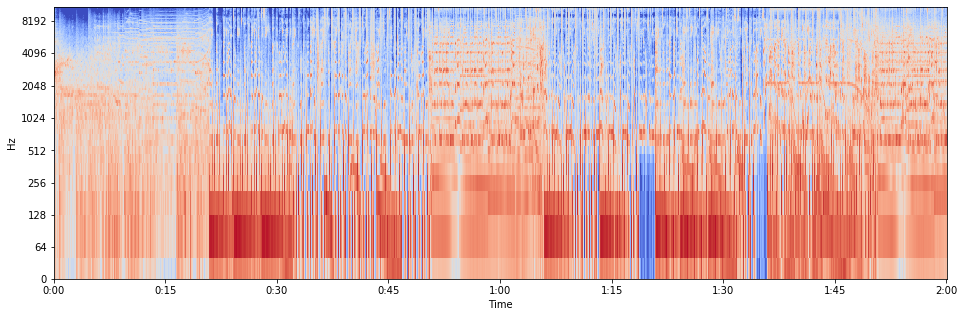

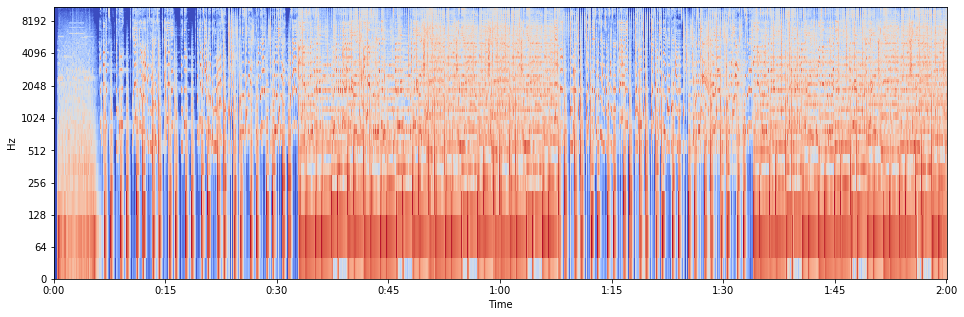

In [13]:
draw(t1,t1_sr)
draw(t2,t2_sr)
draw(t3,t3_sr)

# Biggie Small three sound samples: logspect

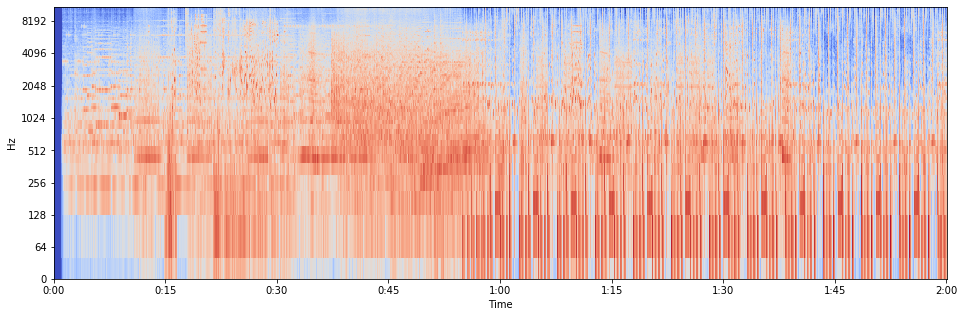

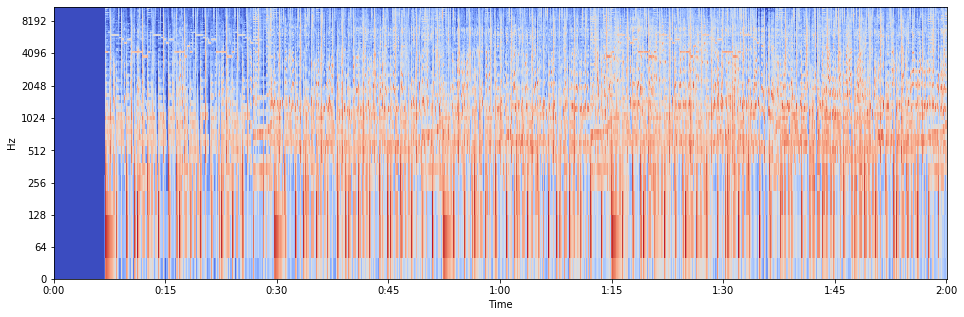

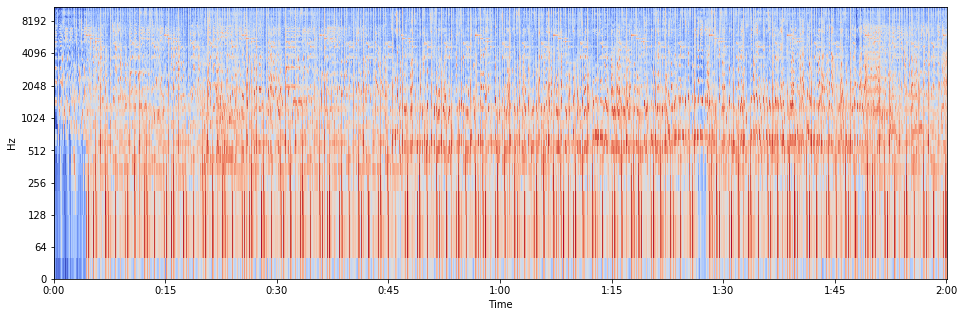

In [14]:
draw(b1,b1_sr)
draw(b2,b2_sr)
draw(b3,b3_sr)

In [36]:
def model(y,sr,y2,sr2):
    mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc= 12)
    mfcc = mfcc.T
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(mfcc)
    mfcc_scaled = scaler.transform(mfcc)
    mfcc2 = librosa.feature.mfcc(y2, sr=sr2, n_mfcc= 12)
    mfcc2 = mfcc2.T
    scaler.fit(mfcc2)
    mfcc2_scaled = scaler.transform(mfcc2)
    features = np.vstack((mfcc_scaled,mfcc2_scaled))
    labels = np.concatenate((np.zeros(len(mfcc_scaled)), np.ones(len(mfcc2_scaled))))
    model = sklearn.svm.SVC()
    model.fit(features, labels)
    return model
    

In [29]:
def result(y,sr,y2,sr2,model):
    scaler = sklearn.preprocessing.StandardScaler()
    mfcc1 = librosa.feature.mfcc(y, sr=sr, n_mfcc= 12).T
    mfcc2 = librosa.feature.mfcc(y2, sr=sr2, n_mfcc= 12).T
    scaler.fit(mfcc1)
    mfcc1_scaled = scaler.transform(mfcc1)
    scaler.fit(mfcc2)
    mfcc2_scaled = scaler.transform(mfcc2)
    test_features = np.vstack((mfcc1_scaled, mfcc2_scaled))
    test_labels = np.concatenate((np.zeros(len(mfcc1_scaled)), np.ones(len(mfcc2_scaled))))
    predicted_labels = model.predict(test_features)
    return model.score(test_features,test_labels)
    

In [17]:
t1t, t1t_sr = librosa.load("audio/taylor.mp3",duration=20,offset=120)
t2t, t2t_sr = librosa.load("audio/taylor2.mp3",duration=20,offset=120)
t3t, t3t_sr = librosa.load("audio/taylor3.mp3",duration=20,offset=120)
b1t, b1t_sr = librosa.load("audio/big.mp3",duration=20,offset=120)
b2t, b2t_sr = librosa.load("audio/big2.mp3",duration=20,offset=120)
b3t, b3t_sr = librosa.load("audio/big3.mp3",duration=20,offset=120)

/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yizong/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home

# Taylor Swift test files

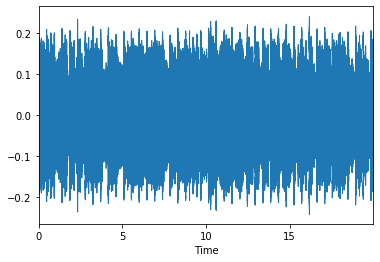

In [18]:
librosa.display.waveplot(t1t,sr=t1t_sr)

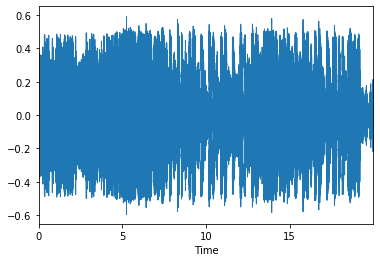

In [19]:
librosa.display.waveplot(t2t,sr=t2t_sr)

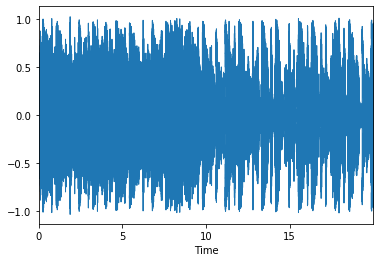

In [20]:
librosa.display.waveplot(t3t,sr=t3t_sr)

# Biggie Small test files

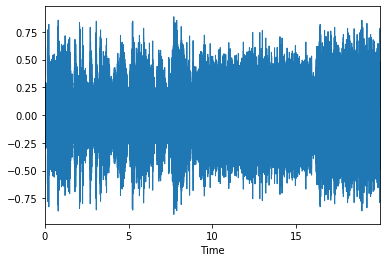

In [23]:
librosa.display.waveplot(b1t,sr=b1t_sr)

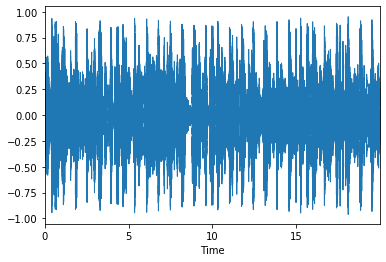

In [24]:
librosa.display.waveplot(b2t,sr=b2t_sr)

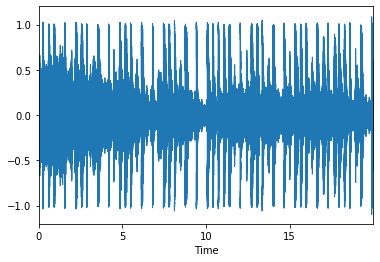

In [25]:
librosa.display.waveplot(b3t,sr=b3t_sr)

# Getting Results

In [32]:
taylor_train, taylor_test = [(t1,t1_sr),(t2,t2_sr),(t3,t3_sr)], [(t1t,t1t_sr),(t2t,t2t_sr),(t3t,t3t_sr)]
biggie_train, biggie_test = [(b1,b1_sr),(b2,b2_sr),(b3,b3_sr)], [(b1t,b1t_sr),(b2t,b2t_sr),(b3t,b3t_sr)]

# Compare to oneself: Taylor Swift

In [42]:
accuracy_t2t = []
for i in range(len(taylor_train)):
    for j in range(i+1,len(taylor_train)):
        accuracy_t2t.append(result(*taylor_test[i],*taylor_test[j],model(*taylor_train[i],*taylor_train[j])))
accuracy_t2t

[0.744199535962877, 0.8010440835266821, 0.7900232018561485]

In [43]:
np.mean(accuracy_t2t)

0.7784222737819025

# Compare to oneself: Biggie Small

In [41]:
accuracy_b2b = []
for i in range(len(biggie_train)):
    for j in range(i+1,len(biggie_train)):
        accuracy_b2b.append(result(*biggie_test[i],*biggie_test[j],model(*biggie_train[i],*biggie_train[j])))
accuracy_b2b

[0.7198375870069605, 0.759860788863109, 0.8080046403712297]

In [44]:
np.mean(accuracy_b2b)

0.7625676720804332

# Compare to Each other

In [45]:
accuracy_b2t = []
for i in range(len(biggie_train)):
    for j in range(len(taylor_train)):
        accuracy_b2t.append(result(*biggie_test[i],*taylor_test[j],model(*biggie_train[i],*taylor_train[j])))
accuracy_b2t

[0.6403712296983759,
 0.7209976798143851,
 0.8288863109048724,
 0.7529002320185615,
 0.7911832946635731,
 0.8451276102088167,
 0.7140371229698376,
 0.8155452436194895,
 0.8938515081206496]

In [46]:
np.mean(accuracy_b2t)

0.7781000257798402

# Discussion of Results

For comparison within Taylor's music, we didn't find extreme similarity in between, which means Taylor makes some variation in her composition styles. However, since the classifer didn't show high score, we can infer that there is a underlying similarity inbetween.

For the same reason, we can say Biggie's music is also homogeneous. If we assume these two figures are representative of Pop and Hip Hop, we might lean towards the idea that there are not much difference in the extent of styles variation between Pop and Hip Hop. It would also be interesting to see new generation Hip Hop artists since Biggie was representative of old style of Hip Hop.

For comparison between two artists, we found that for every song of Biggie, the classifier shows distinction between it and Taylor's new Hit "The Man". This is very interesting since it implies both the difference between Pop and Hip Hop and the difference between different generations.
